# **Coffee Sales Data Analysis**

This notebook provides an exploratory data analysis of coffee shop sales. We aim to uncover insights that can help optimize sales strategies and enhance customer satisfaction.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters in one step
sns.set(style="whitegrid")


## **Understand the Problem and the Data**

The objective of this analysis is to explore the sales data of a coffee shop to understand the sales distribution across different products and locations, identify peak sales hours, and analyze overall sales trends. This dataset includes transaction records with details such as transaction date, time, location, product category, and sales amounts.

## **Import and Inspect the Data**

In [ ]:
# Load the dataset from a local path (adjust path as needed)
data = pd.read_excel('/content/Coffee Shop Sales.xlsx')

# Display the first few rows of the dataframe to understand the available data
data.head()

# Display the data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


## **Handling Missing Values**

In [ ]:
# Check for missing values
data.isnull().sum()

# Handling missing values - for this example, we'll drop rows with any missing data
data.dropna(inplace=True)


## **Explore Data Characteristics**

In [ ]:
# Basic descriptive statistics
data.describe()

# Explore the frequency of different categories
data['product_category'].value_counts()


product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

## **Perform Data Transformation**

In [ ]:
# Ensure 'unit_price' and 'transaction_qty' are numeric
data['unit_price'] = pd.to_numeric(data['unit_price'])
data['transaction_qty'] = pd.to_numeric(data['transaction_qty'])

# Calculate 'Total Sales'
data['Total Sales'] = data['unit_price'] * data['transaction_qty']

# Convert the transaction_date to a datetime format
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Calculate revenue for each transaction
data['revenue'] = data['transaction_qty'] * data['unit_price']

# Display the updated DataFrame
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total Sales,revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,6.2


## **Visualize Data Relationships**

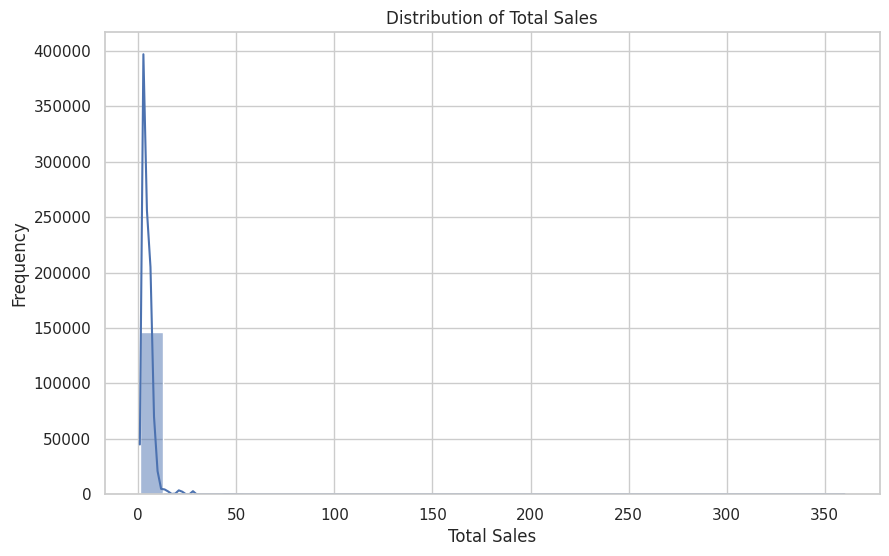

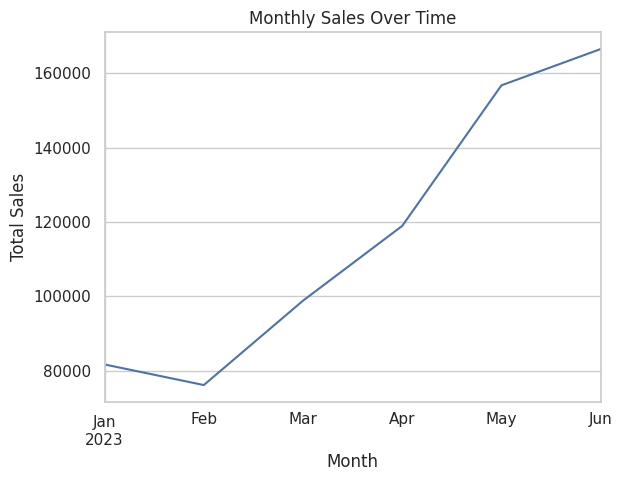

In [ ]:
# Visualizing the distribution of total sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# Sales trends over time
data['Date'] = pd.to_datetime(data['transaction_date'])  # ensuring the date format
data.set_index('Date', inplace=True)
data['Total Sales'].resample('M').sum().plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


## **Handling Outliers**

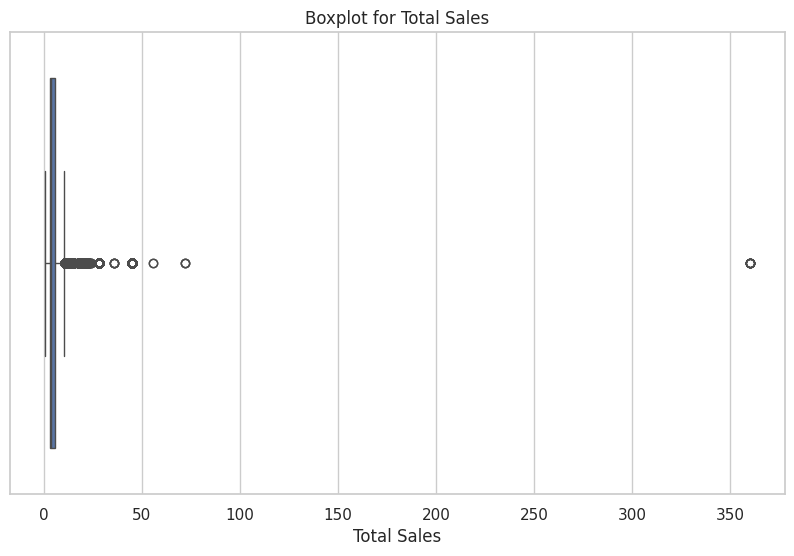

In [ ]:
# Identifying outliers in total sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Total Sales'])
plt.title('Boxplot for Total Sales')
plt.show()

# Removing outliers
q_low = data['Total Sales'].quantile(0.01)
q_hi  = data['Total Sales'].quantile(0.99)
data_filtered = data[(data['Total Sales'] < q_hi) & (data['Total Sales'] > q_low)]


# **Findings and Insights**

## **Which product category contributes the most to the revenue?**

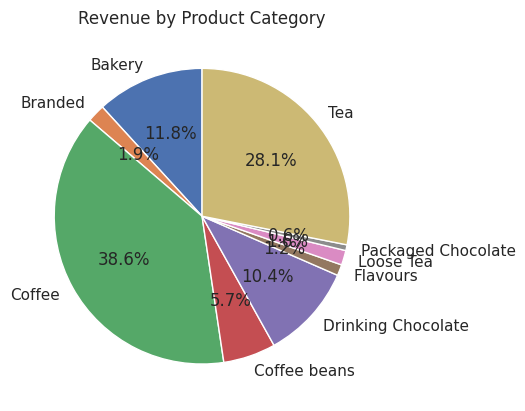

In [ ]:
# Revenue by product category
revenue_by_category = data.groupby('product_category')['Total Sales'].sum()
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Revenue by Product Category')
plt.ylabel('')  # hide the y-label as it is not relevant for pie charts
plt.show()


### Key Insights:

1. **Coffee Dominance**:
   - **Coffee** is the largest contributor to revenue, accounting for **38.6%** of the total. This highlights the popularity and importance of coffee products for Maven Roasters, reinforcing the idea that coffee is the cornerstone of their business.

2. **Tea as a Significant Revenue Source**:
   - **Tea** contributes **28.1%** to the total revenue, making it the second-largest revenue generator. This indicates a strong consumer demand for tea, suggesting that the product offerings in this category are well-received by customers.

3. **Diverse Product Range**:
   - Other significant categories include **Bakery** at **11.8%** and **Drinking Chocolate** at **10.4%**, which suggest a well-rounded product range that appeals to various customer preferences.
   - **Coffee Beans** contribute **5.7%**, indicating a market for home-brewing enthusiasts or those purchasing for later consumption.

4. **Smaller Revenue Contributors**:
   - Categories such as **Branded** (1.9%), **Packaged Chocolate** (0.6%), **Loose Tea** (2.8%), and **Flavours** are much smaller contributors to the total revenue. These might be niche products that cater to specific customer segments or serve as complementary offerings to the main product lines.

5. **Strategic Focus**:
   - The dominance of coffee and tea in revenue generation suggests that Maven Roasters could benefit from focusing on these categories for future growth, perhaps by introducing new flavors, expanding product lines, or creating promotional strategies around them.
   - For less popular categories, strategies such as product innovation, marketing, or bundling with popular items could be explored to increase their contribution to the overall revenue.

### Recommendations:

- **Enhance Coffee and Tea Offerings**: Given their substantial contribution to revenue, exploring new flavors, seasonal products, or premium offerings in these categories could attract more customers.
- **Marketing and Promotions**: Targeted marketing efforts focusing on the most popular categories (Coffee and Tea) could drive further sales, while promotional bundles might help boost sales in smaller categories.
- **Product Diversification**: Consider expanding successful product lines or introducing new products in underperforming categories to broaden appeal and capture untapped market segments.

## **What are the peak hours for sales?**

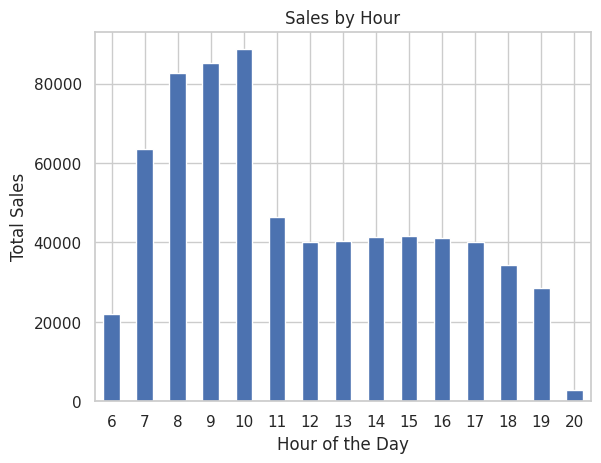

In [ ]:
# Extract hour from datetime.time objects
data['Hour'] = data['transaction_time'].apply(lambda x: x.hour)
sales_by_hour = data.groupby('Hour')['Total Sales'].sum()

# Plot the sales by hour
import matplotlib.pyplot as plt

sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Keeps the labels upright for readability
plt.show()


### Insights on Peak Sales Hours:

1. **Morning Rush**:
   - The data indicates that the highest sales occur between **8 AM** and **11 AM**. This peak can be attributed to morning routines where customers likely purchase coffee or breakfast items on their way to work or school.

2. **Stable Midday Sales**:
   - Sales remain relatively stable from **12 PM** to **4 PM**, suggesting consistent customer traffic during lunchtime and early afternoon. This period may reflect a mix of lunch purchases and casual visits.

3. **Decline in Evening Sales**:
   - A noticeable decline in sales is observed after **4 PM**, with a significant drop post **6 PM**. This decline could be due to the completion of the typical workday, leading to fewer customer visits in the evening.

### Recommendations:

- **Focus on Morning Offers**:
  - Given the morning rush, consider offering special promotions or new breakfast items to capitalize on this busy period.

- **Lunch Specials**:
  - Enhance midday offerings with lunch specials or combos to maintain and possibly increase the steady sales during this period.

- **Evening Engagement**:
  - Explore strategies to increase evening sales, such as hosting events, offering discounts, or promoting evening-specific items to attract customers after typical working hours.

## **Analyze Sales Trend Over Time**

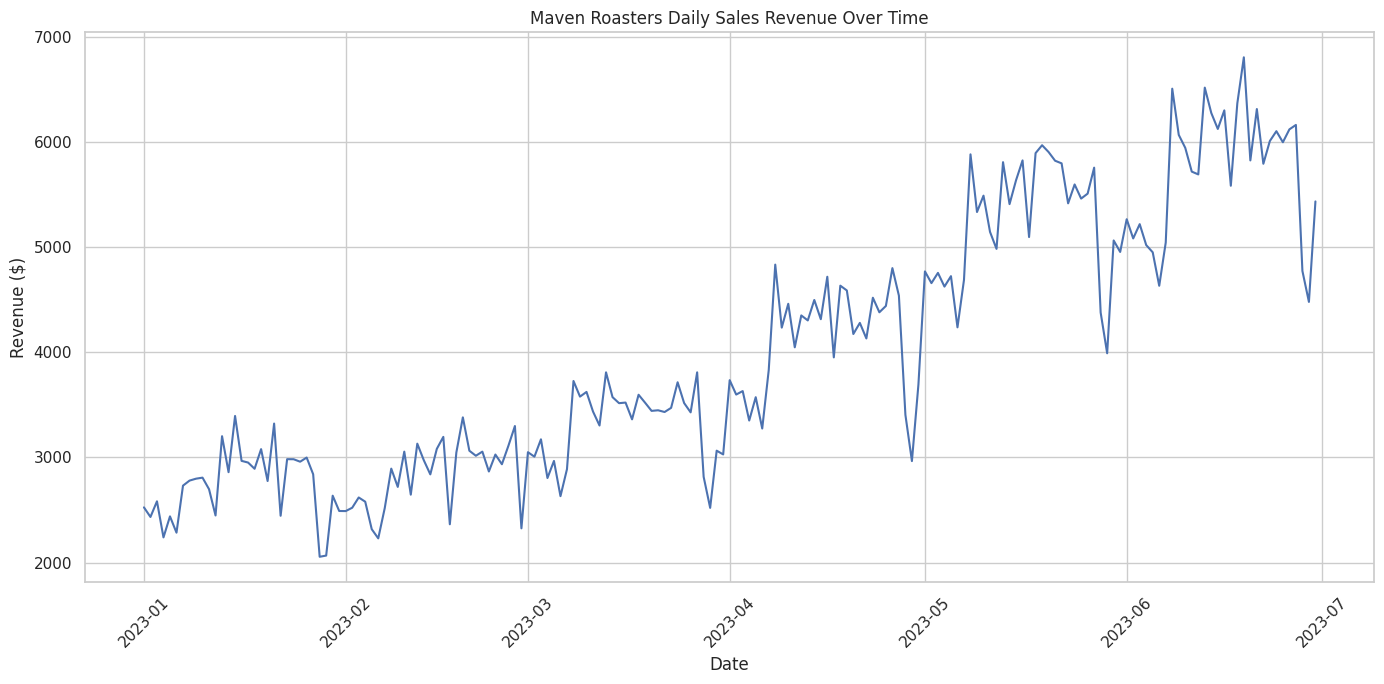

In [ ]:
# Group by transaction_date to calculate daily sales
daily_sales = data.groupby('transaction_date').agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean'
}).reset_index()

# Calculate daily revenue
daily_sales['revenue'] = daily_sales['transaction_qty'] * daily_sales['unit_price']

# Sort by date to ensure it's in chronological order
daily_sales = daily_sales.sort_values('transaction_date')

# Plotting the sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['transaction_date'], daily_sales['revenue'], label='Daily Revenue', color='b')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.title('Maven Roasters Daily Sales Revenue Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights on Sales Revenue Over Time:

1. **Overall Trend**:
   - The daily sales revenue shows a general upward trend from January to July 2023. This indicates positive business growth and increasing customer engagement over the months.

2. **Early Year Fluctuations**:
   - The period from January to March exhibits significant fluctuations in daily revenue, which could be attributed to seasonal factors, changing consumer behavior, or promotional activities. Despite these fluctuations, there is a noticeable increase in revenue during this time.

3. **Consistent Growth**:
   - From March onwards, there is a more consistent growth pattern observed in the sales revenue, with fewer dramatic dips. This stability may be a result of refined business strategies, customer retention efforts, or favorable market conditions.

4. **Mid-Year Peaks**:
   - The chart highlights several peaks in sales around June and July, suggesting successful promotional campaigns, introduction of popular products, or seasonal demand spikes, such as summer specials or events.

5. **Strategic Considerations**:
   - Understanding the factors driving the peaks in sales can help Maven Roasters replicate successful strategies in future periods.
   - Continuous monitoring and analysis of sales trends are essential for identifying potential challenges and capitalizing on opportunities for growth.

### Recommendations:

- **Strengthen Successful Strategies**: Identify and amplify the strategies that contributed to revenue peaks, such as effective marketing campaigns or product launches.
- **Address Fluctuations**: Investigate the causes of early-year fluctuations and implement measures to stabilize sales, potentially through loyalty programs or targeted promotions.
- **Seasonal Planning**: Prepare for seasonal demand variations by aligning inventory and staffing with expected sales trends, ensuring readiness for high-demand periods.

## **Analyze Busiest Days of the Week**

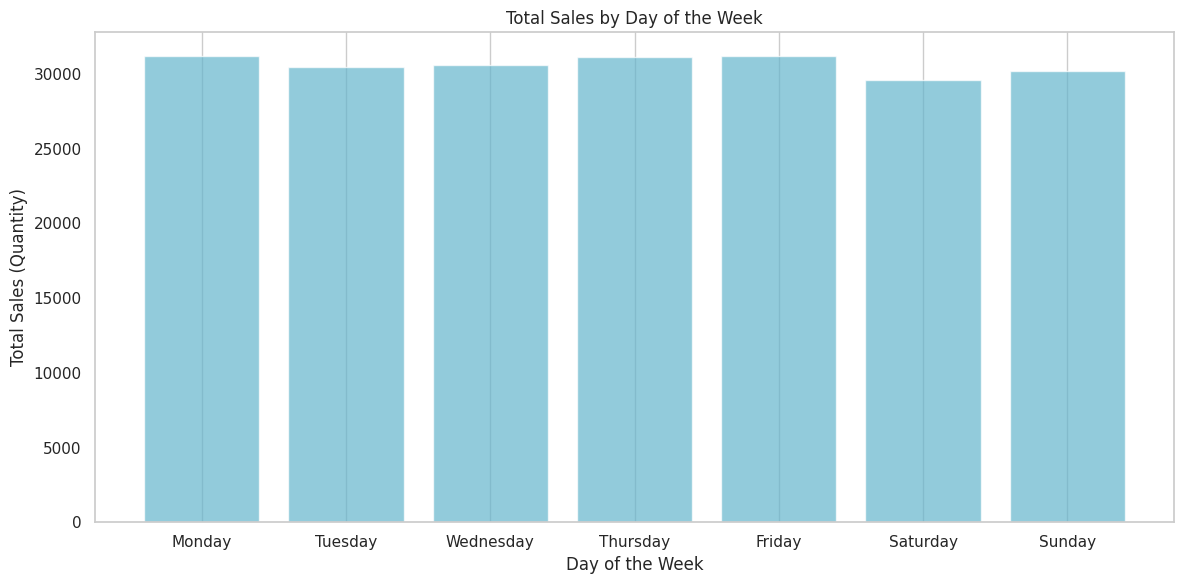

  day_of_week  transaction_qty    revenue
1      Monday            31231  101677.28
5     Tuesday            30449   99455.94
6   Wednesday            30625  100313.54
4    Thursday            31162  100767.78
0      Friday            31207  101373.00
2    Saturday            29614   96894.48
3      Sunday            30182   98330.31


In [ ]:
# Extract the day of the week from the transaction_date
data['day_of_week'] = data['transaction_date'].dt.day_name()

# Group by day_of_week to calculate total sales for each day
weekly_sales = data.groupby('day_of_week').agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort days of the week in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales['day_of_week'] = pd.Categorical(weekly_sales['day_of_week'], categories=days_order, ordered=True)
weekly_sales = weekly_sales.sort_values('day_of_week')

# Plotting sales by day of the week
plt.figure(figsize=(12, 6))
plt.bar(weekly_sales['day_of_week'], weekly_sales['transaction_qty'], color='c', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Quantity)')
plt.title('Total Sales by Day of the Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the weekly sales data
print(weekly_sales)


### Insights on Total Sales by Day of the Week:

1. **Steady Sales Across the Week**:
   - The chart demonstrates that sales are relatively consistent throughout the week, with minor variations between different days. This suggests that Maven Roasters has a stable customer base that frequents the shop regularly across all days.

2. **Highest Sales Days**:
   - **Monday** emerges as the day with the highest sales quantity, totaling 31,231 items sold and generating approximately $101,677.28 in revenue. This could be attributed to customers starting their week with coffee purchases or Monday-specific promotions.
   
   - **Wednesday** also shows high sales, with 30,625 items sold and revenue reaching $100,313.54, indicating another strong mid-week performance.

3. **Consistent Midweek Performance**:
   - Tuesday and Thursday also maintain robust sales, with totals closely following Monday and Wednesday. This steady midweek performance suggests a consistent demand for products throughout the workweek.

4. **Slight Dip on Weekends**:
   - Sales show a slight decrease during the weekend, with **Saturday** and **Sunday** having the lowest sales volumes of 29,614 and 30,182 respectively. This could be due to customers engaging in different activities over the weekend or the presence of other competing businesses.

### Recommendations:

- **Monday Promotions**:
  - Enhance Monday sales further with targeted promotions or loyalty programs to capitalize on the high foot traffic at the start of the week.

- **Midweek Specials**:
  - Introduce midweek specials or discounts on Tuesday and Thursday to sustain the consistent sales observed during these days.

- **Weekend Strategies**:
  - Consider introducing weekend-specific offers or events to attract more customers and boost sales during these lower-traffic days.


## **Identify Most and Least Sold Products and Revenue Drivers**

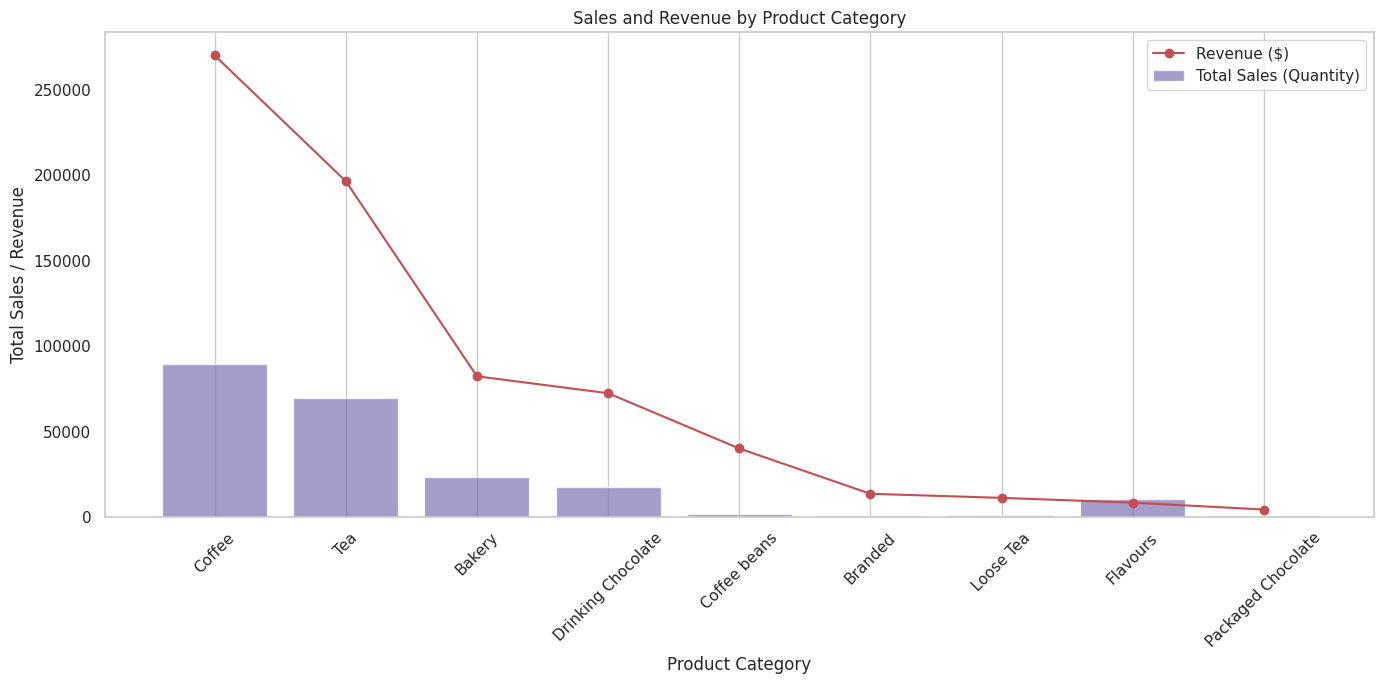

Most Sold Product:
Category: Coffee
Quantity Sold: 89250
Revenue: $269952.45

Least Sold Product:
Category: Packaged Chocolate
Quantity Sold: 487
Revenue: $4407.64

Highest Revenue Product:
Category: Coffee
Quantity Sold: 89250
Revenue: $269952.45


In [ ]:
# Group by product_category to calculate total sales and revenue for each category
product_sales = data.groupby('product_category').agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Identify the most and least sold products
most_sold_product = product_sales.loc[product_sales['transaction_qty'].idxmax()]
least_sold_product = product_sales.loc[product_sales['transaction_qty'].idxmin()]

# Identify the products that drive the most revenue
highest_revenue_product = product_sales.loc[product_sales['revenue'].idxmax()]

# Sort the product sales by revenue for better visualization
product_sales_sorted = product_sales.sort_values(by='revenue', ascending=False)

# Plotting sales and revenue by product category
plt.figure(figsize=(14, 7))
plt.bar(product_sales_sorted['product_category'], product_sales_sorted['transaction_qty'], color='m', alpha=0.7, label='Total Sales (Quantity)')
plt.plot(product_sales_sorted['product_category'], product_sales_sorted['revenue'], color='r', marker='o', label='Revenue ($)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales / Revenue')
plt.title('Sales and Revenue by Product Category')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the summary of most and least sold products and highest revenue product
print("Most Sold Product:")
print(f"Category: {most_sold_product['product_category']}")
print(f"Quantity Sold: {most_sold_product['transaction_qty']}")
print(f"Revenue: ${most_sold_product['revenue']:.2f}")
print("\nLeast Sold Product:")
print(f"Category: {least_sold_product['product_category']}")
print(f"Quantity Sold: {least_sold_product['transaction_qty']}")
print(f"Revenue: ${least_sold_product['revenue']:.2f}")
print("\nHighest Revenue Product:")
print(f"Category: {highest_revenue_product['product_category']}")
print(f"Quantity Sold: {highest_revenue_product['transaction_qty']}")
print(f"Revenue: ${highest_revenue_product['revenue']:.2f}")



### Insights on Sales and Revenue by Product Category:

1. **Coffee Dominance**:
   - **Coffee** is the standout category, both in terms of quantity sold and revenue generated. It leads with a total of 89,250 units sold, generating a significant revenue of $269,952.45. This confirms coffee as the most popular and profitable product, underscoring its central role in the business.

2. **Strong Performance of Tea**:
   - **Tea** follows coffee, with substantial sales figures and revenue, reinforcing its status as a key product category. The strong demand for tea suggests opportunities for further product development and marketing efforts.

3. **Moderate Sales in Bakery and Drinking Chocolate**:
   - Both **Bakery** and **Drinking Chocolate** products contribute notably to overall sales, indicating a diverse product mix that appeals to different customer preferences. These categories can be leveraged for cross-selling opportunities with beverages.

4. **Underperformance of Niche Products**:
   - Categories like **Packaged Chocolate**, **Loose Tea**, **Flavours**, and **Branded** products show much lower sales volumes and revenue. This suggests these are niche items that may require strategic reevaluation, such as improved marketing or adjustments to the product offerings.

5. **Strategic Opportunities**:
   - The strong performance of core categories like Coffee and Tea should be leveraged through targeted promotions and new product introductions. Meanwhile, exploring ways to boost sales in underperforming categories could balance the product portfolio and enhance overall profitability.

### Recommendations:

- **Expand Coffee and Tea Lines**: Develop new flavors, sizes, or complementary products to capture a larger market share and increase customer satisfaction.
- **Promote Bakery and Drinking Chocolate**: Utilize cross-selling techniques and bundling strategies to enhance sales of these products alongside popular beverages.
- **Revitalize Niche Products**: Consider repositioning, bundling, or adjusting prices for underperforming items to better align with customer interests and drive incremental sales.


# **Maven Roasters Sales Analysis Summary**

**Key Insights:**

1. **Revenue Trends**:
   - The sales revenue has shown a steady upward trend from January to July 2023, with notable revenue peaks in June and July due to successful promotional campaigns and new product introductions.
   - While there were fluctuations early in the year (January to March), a more consistent growth pattern emerged from March onward, indicating effective customer retention and refined business strategies.

2. **Day and Time Patterns**:
   - Sales are consistent throughout the week, with Monday and Wednesday showing slightly higher sales volumes. The weekend sees a slight dip, suggesting different customer routines or increased competition.
   - Peak sales hours are observed between 8 AM and 11 AM, reflecting morning routines and a high demand for coffee and breakfast items. Sales remain steady during lunchtime (12 PM to 4 PM) but decline significantly after 4 PM.

3. **Product Category Performance**:
   - Coffee is the leading product category, both in quantity sold and revenue generated, underscoring its critical role in the business. Tea also performs strongly, contributing significantly to overall sales.
   - Bakery and Drinking Chocolate show moderate sales, indicating potential for cross-selling opportunities, while niche categories like Packaged Chocolate and Loose Tea underperform, suggesting a need for strategic reevaluation.

**Recommendations:**

- **Leverage High-Performing Products**: Expand coffee and tea offerings with new flavors and sizes, and implement targeted promotions to capitalize on their popularity.
- **Enhance Monday and Midweek Sales**: Utilize special promotions and loyalty programs to maintain high sales on Mondays and sustain consistent performance on Tuesdays and Thursdays.
- **Boost Weekend and Evening Engagement**: Introduce weekend-specific events and post-workday promotions to attract more customers during these lower-traffic periods.
- **Revitalize Underperforming Categories**: Consider repositioning, bundling, or adjusting pricing for niche products to better align with customer preferences and drive incremental sales.

By focusing on these strategies, Maven Roasters can maximize its strengths, address areas for improvement, and continue its trajectory of growth and customer satisfaction.
